# Question 1: Use yfinance to Extract Tesla Stock Data

In [3]:
import yfinance

In [5]:
tesla_data = yfinance.download("TSLA")

[*********************100%***********************]  1 of 1 completed


In [7]:
tesla_data.reset_index(inplace=True)

In [8]:
tesla_data.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


# Question 2: Use Webscraping to Extract Tesla Revenue Data

In [52]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

response = requests.get(url)
html_data = response.text

soup = BeautifulSoup(html_data, "html.parser")

table = soup.find_all("table", {"class": "historical_data_table table"})

df = pd.read_html(str(table))[1]

df.columns = ["Date", "Revenue"]

df["Revenue"] = df["Revenue"].str.replace(r"\$", "", regex=True)
df["Revenue"] = df["Revenue"].str.replace(r",", "", regex=True)
df["Revenue"] = pd.to_numeric(df["Revenue"], errors="coerce")

df.dropna(inplace=True)

print(df.tail())

          Date  Revenue
48  2010-09-30     31.0
49  2010-06-30     28.0
50  2010-03-31     21.0
52  2009-09-30     46.0
53  2009-06-30     27.0


C:\Users\zaid.irshad\AppData\Local\Temp\ipykernel_15208\1589627668.py:14: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[1]


# Question 3

In [28]:
gme_data = yfinance.download("GME")

[*********************100%***********************]  1 of 1 completed


In [29]:
gme_data.reset_index(inplace=True)

In [31]:
gme_data.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,GME,GME,GME,GME,GME
0,2002-02-13,1.691666,1.693350,1.603296,1.620128,76216000
1,2002-02-14,1.683250,1.716074,1.670626,1.712707,11021600
2,2002-02-15,1.674834,1.687459,1.658002,1.683251,8389600
3,2002-02-19,1.607504,1.666418,1.578047,1.666418,7410400
4,2002-02-20,1.662210,1.662210,1.603296,1.615920,6892800


# Question 4: Use Webscraping to Extract GME Revenue Data

In [53]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

response = requests.get(url)
html_data = response.text

soup = BeautifulSoup(html_data, "html.parser")

table = soup.find_all("table", {"class": "historical_data_table table"})

df = pd.read_html(str(table))[1]

df.columns = ["Date", "Revenue"]

df["Revenue"] = df["Revenue"].str.replace(r"\$", "", regex=True)
df["Revenue"] = df["Revenue"].str.replace(r",", "", regex=True)
df["Revenue"] = pd.to_numeric(df["Revenue"], errors="coerce")

df.dropna(inplace=True)

print(df.tail())

          Date  Revenue
57  2006-01-31     1667
58  2005-10-31      534
59  2005-07-31      416
60  2005-04-30      475
61  2005-01-31      709


C:\Users\zaid.irshad\AppData\Local\Temp\ipykernel_15208\402560587.py:14: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[1]


# Question 5: Plot Tesla Stock Graph

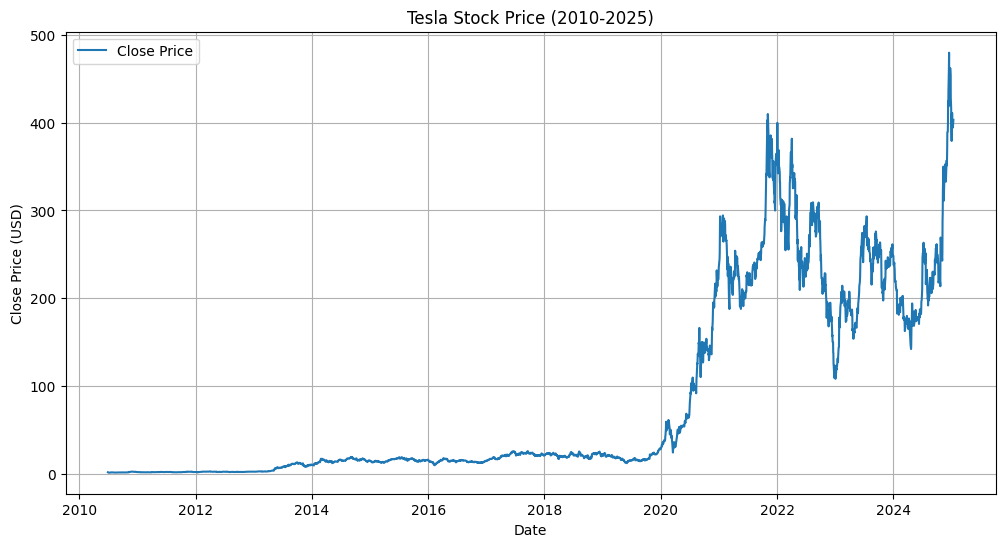

In [54]:
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data["Date"], data["Close"], label="Close Price")
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Close Price (USD)")
    plt.legend()
    plt.grid()
    plt.show()
    
make_graph(tesla_data, "Tesla Stock Price (2010-2025)")

# Question 6: Plot GameStop Stock Graph

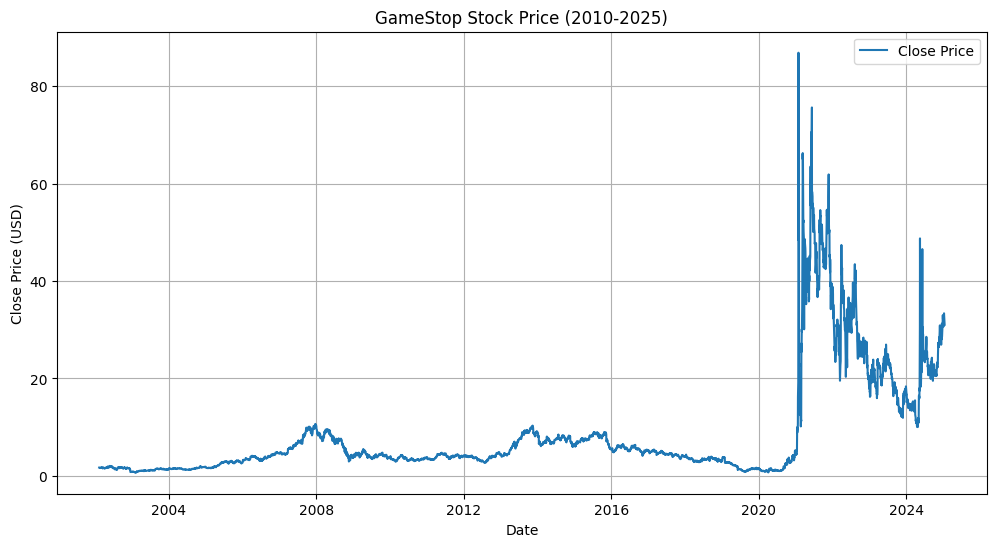

In [55]:
# Plot GameStop stock graph
make_graph(gme_data, "GameStop Stock Price (2003-2025)"